In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Cargar modelo
model = joblib.load("../models/xgb_model.pkl")

# Cargar datos
df = pd.read_csv("../data/processed/features_dataset.csv")
drop_cols = ["UserID", "MovieID", "Rating"]
X = df.drop(columns=drop_cols)
y = df["Rating"]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)


In [3]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 RMSE: {rmse:.4f}")
print(f"📊 MAE: {mae:.4f}")
print(f"📊 R²: {r2:.4f}")


📊 RMSE: 0.9015
📊 MAE: 0.7143
📊 R²: 0.3453


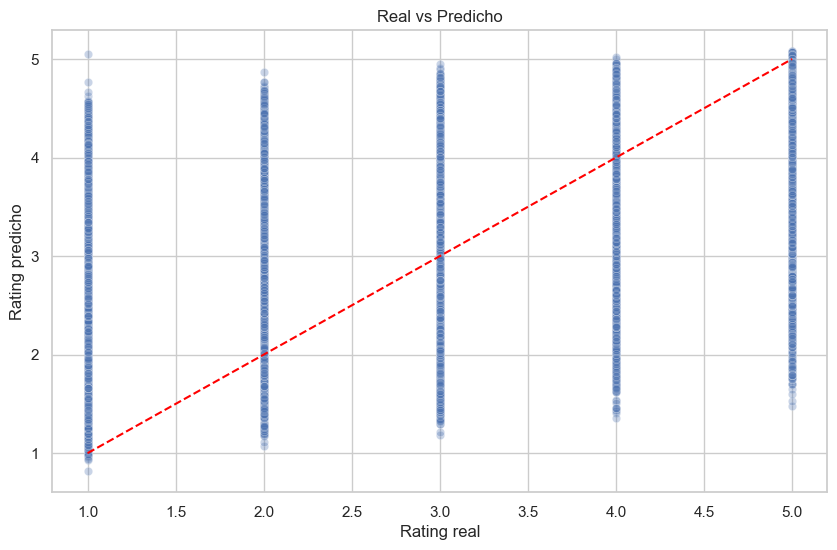

In [4]:
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([1, 5], [1, 5], color="red", linestyle="--")
plt.xlabel("Rating real")
plt.ylabel("Rating predicho")
plt.title("Real vs Predicho")
plt.show()


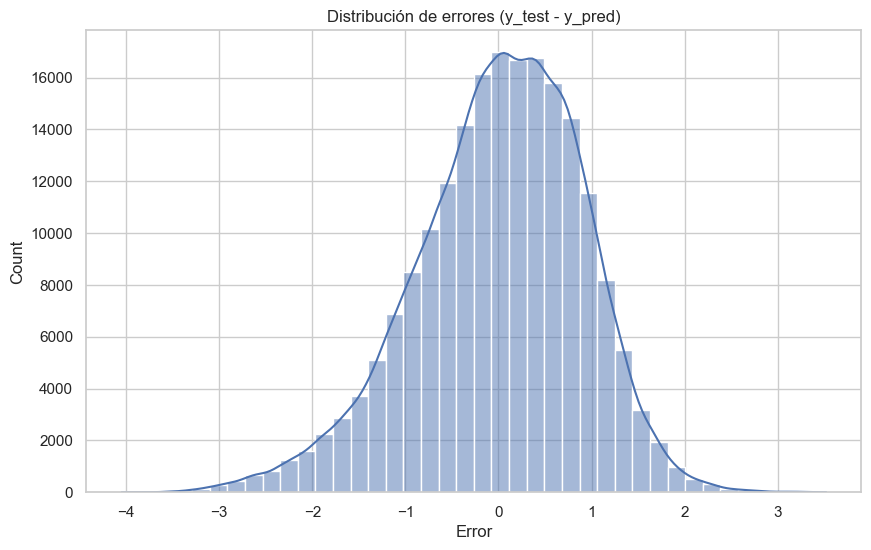

In [5]:
errors = y_test - y_pred
sns.histplot(errors, bins=40, kde=True)
plt.title("Distribución de errores (y_test - y_pred)")
plt.xlabel("Error")
plt.show()


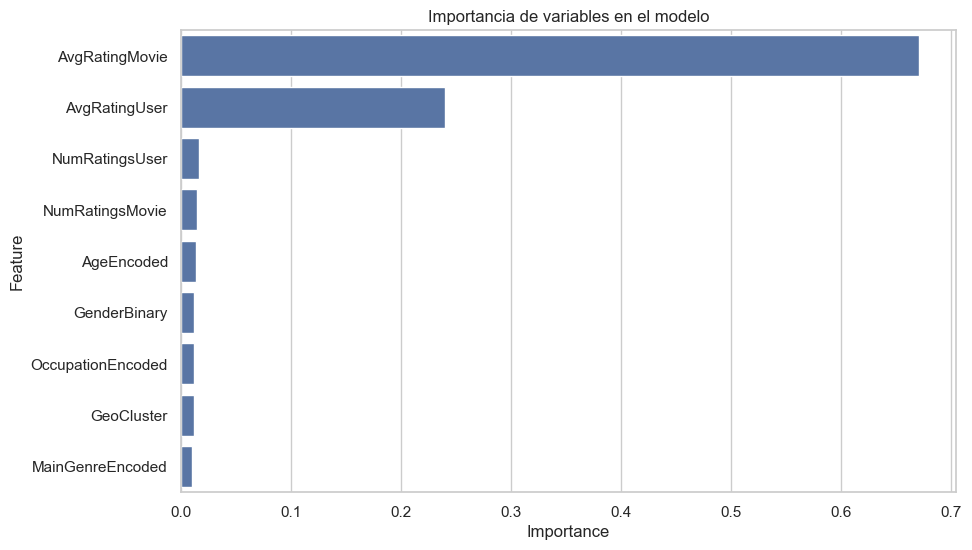

In [6]:
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Importancia de variables en el modelo")
plt.show()


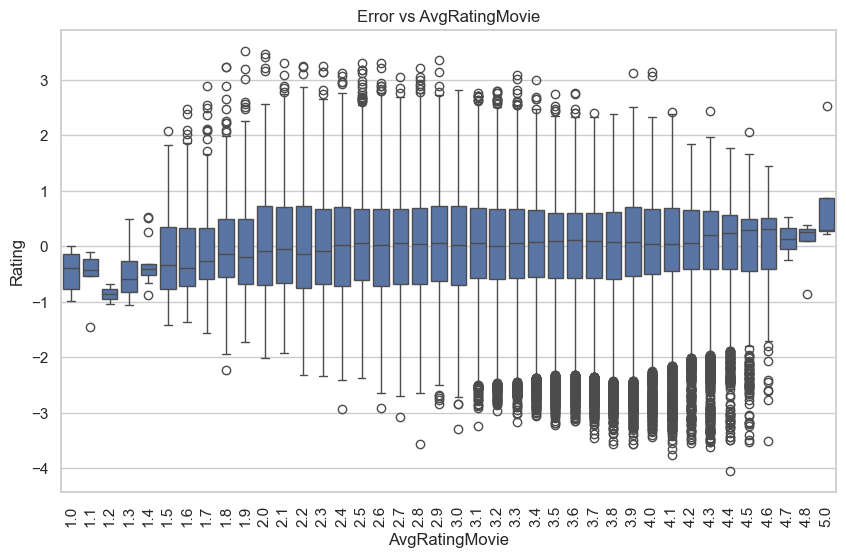

In [7]:
sns.boxplot(x=X_test["AvgRatingMovie"].round(1), y=errors)
plt.title("Error vs AvgRatingMovie")
plt.xticks(rotation=90)
plt.show()
